# SET decoder 

Full documentation of the game rules [here](https://www.setgame.com/sites/default/files/instructions/SET%20INSTRUCTIONS%20-%20ENGLISH.pdf):

## Qualities or attributes of the shapes contained in the cards:
- shape: oval, squiggle, diamond
- color: red, purple, green
- number: 1, 2, 3
- shading: solid, stripped or outlined

## 1. Creation of the cards
Creation of the cards as variables to test the set game solver.

In [2]:
# store in diff list diff caracteristics of the set:

shapes = ['oval', 'squiggle', 'diamond']
colors = ['red', 'purple', 'green']
numbers = [1, 2, 3]
shadings = ['solid', 'stripped', 'outlined']

In [3]:
# store all variations in a list through a comprehension list with the shades, color, numbers, shadings

variations = [f'{number} {color} {shape} {shade}'
               for shade in shadings
               for number in numbers
               for color in colors
               for shape in shapes]

In [4]:
print(f"There are {len(variations)} different card combinations.")

There are 81 different card combinations.


In [5]:
# create different variables for testing
for n in range(len(variations)):
    locals()[f'card{n}'] = variations[n].split(" ")

# store them in a dict to find the matches
cards = {}

for n in range(len(variations)):
    cards[f'card{n}'] = variations[n].split(" ")

## 2. Sample data for algorithm testing:

We need to find the cards that match, aka make a set. We will make a set with cards that contain 1, 2 and 3 green ovals with stripped shading. This cards make a set because they share the color, shape and shading but have a different number of ovals within them.

The cards chosen for our sample set look like this:

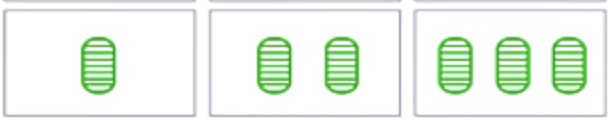

In [6]:
target_values = [
    ['1', 'green', 'oval', 'stripped'],
    ['2', 'green', 'oval', 'stripped'],
    ['3', 'green', 'oval', 'stripped']
]

matching_keys = []

for k, v in cards.items():
    if v in target_values:
        matching_keys.append(k)
        
matching_keys

['card33', 'card42', 'card51']

## 3. Creation of the algorithm:

In [7]:
def is_set(card1, card2, card3):
    # list of qualities that a card has
    qualities = ['color', 'shape', 'number', 'shading']
    # this order prioritizes color and shape in the output, as disparities in these qualities are more discernible than in number. 
    # thus, emphasizing color and shape enhances legibility.
    qualities_order = {'color': 1, 'shape': 2, 'number': 0, 'shading': 3}

    for quality in qualities:
        i = qualities_order[quality]
        # all values from a certain quality are different from each other
        if not ((card1[i] == card2[i] == card3[i]) or (card1[i] != card2[i] and card1[i] != card3[i])):
        # when previous conditions are not met
            # store the common value for the return's print
            common_value = card1[i] if card1[i] == card2[i] or card1[i] == card3[i] else card2[i]
            
            # idem for the diff value. we part from the base that they are all not the same thanks to the former if
            differing_value = card1[i] if card2[i] == card3[i] else (card2[i] if card1[i] == card3[i] else card3[i])
            
            return f"Not a set: (ｏ・_・)ノ”(ノ_<、)☆ ... Two are {quality} {common_value}, while one is {quality} {differing_value}."


    # if there are no inconsistencies found, it's a SET!!!
    return "It's a set! ☆⌒ヽ(*'､^*)chu (*^^*)♡"


## 4. Testing:

### 4.1. Cases where the cards are NOT a Set:

#### 4.1.1 When 2 share the same number:

In [50]:
# if card17 had 1 diamond insted of two, it would be a set. 
# but they can't have two different qualities, only 1 or all of them.
print(card6, card7, card17)

is_set(card6, card7, card17)

['1', 'green', 'oval', 'solid'] ['1', 'green', 'squiggle', 'solid'] ['2', 'green', 'diamond', 'solid']


'Not a set: (ｏ・_・)ノ”(ノ_<、)☆ ... Two are number 1, while one is number 2.'

#### 4.1.2 When 2 share the same shape:

In [52]:
# if card44 had an oval shape instead of an oval, it would be a set. 
# but they can't have two different qualities, only 1 or all of them.
print(card33, card44, card51)

is_set(card33, card44, card51)

['1', 'green', 'oval', 'stripped'] ['2', 'green', 'diamond', 'stripped'] ['3', 'green', 'oval', 'stripped']


'Not a set: (ｏ・_・)ノ”(ノ_<、)☆ ... Two are shape oval, while one is shape diamond.'

#### 4.1.3 When 2 share the same color:

In [54]:
# if figure in card49 was green, it would be a set. 
# but they can't have two different qualities, only 1 or all of them.
print(card33, card44, card49)

is_set(card33, card44, card49)

['1', 'green', 'oval', 'stripped'] ['2', 'green', 'diamond', 'stripped'] ['3', 'purple', 'squiggle', 'stripped']


'Not a set: (ｏ・_・)ノ”(ノ_<、)☆ ... Two are color green, while one is color purple.'

#### 4.1.4 When 2 share the same shading:

In [56]:
print(card33, card42, card24)

is_set(card33, card42, card24)

['1', 'green', 'oval', 'stripped'] ['2', 'green', 'oval', 'stripped'] ['3', 'green', 'oval', 'solid']


'Not a set: (ｏ・_・)ノ”(ノ_<、)☆ ... Two are shading stripped, while one is shading solid.'

### 4.2 When they are a set

#### 4.2.1 They share 3 out of 4 attributes

In [8]:
## a set:
card33, card42, card51

(['1', 'green', 'oval', 'stripped'],
 ['2', 'green', 'oval', 'stripped'],
 ['3', 'green', 'oval', 'stripped'])

In [9]:
is_set(card33, card42, card51)

"It's a set! ☆⌒ヽ(*'､^*)chu (*^^*)♡"

#### 4.2.2 They do not share any attribute

In [33]:
## a set. they do not share any attribute or quality:
print(card28, card68, card24)

is_set(card24, card68, card28)

['1', 'red', 'squiggle', 'stripped'] ['2', 'purple', 'diamond', 'outlined'] ['3', 'green', 'oval', 'solid']


"It's a set! ☆⌒ヽ(*'､^*)chu (*^^*)♡"